<a href="https://colab.research.google.com/github/onepiece-nika/onepiece-nika/blob/main/ClasificadorDeIris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-learn pandas numpy matplotlib seaborn

In [2]:
from sklearn.datasets import load_iris
import pandas as pd


In [3]:
iris = load_iris()           #Cargar el dataset de Iris
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [4]:
X = pd.DataFrame(iris.data, columns=iris.feature_names)  # Características
y = pd.Series(iris.target, name='species')  # Etiquetas (0, 1, 2 para setosa, versicolor, virginica)


print(X.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [5]:
print("\nNombres de las especies:", iris.target_names)


Nombres de las especies: ['setosa' 'versicolor' 'virginica']


Precisión del modelo: 100.00%


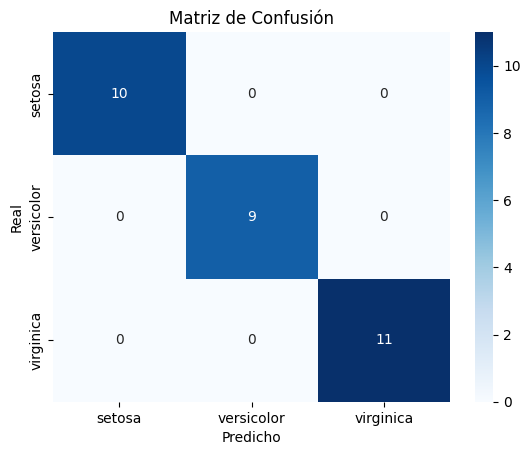

In [6]:
# Importar bibliotecas necesarias
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Cargar el dataset de Iris
iris = load_iris()
X = iris.data  # Características (largo/ancho de sépalos y pétalos)
y = iris.target  # Etiquetas (0: setosa, 1: versicolor, 2: virginica)

# 2. Preprocesar los datos
# Dividir en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar las características (opcional, pero recomendado para KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3. Crear y entrenar el modelo KNN
model = KNeighborsClassifier(n_neighbors=3)  # Usamos 3 vecinos
model.fit(X_train, y_train)  # Entrenar el modelo

# 4. Hacer predicciones y evaluar
y_pred = model.predict(X_test)  # Predecir en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)  # Calcular precisión
print(f"Precisión del modelo: {accuracy * 100:.2f}%")

# Visualizar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()